In [1]:
import pandas as pd
import numpy as np

# Read your CSV data into a DataFrame
data = pd.read_csv("./final_inflation_vs_stock_values.csv")

# Calculate the correlation coefficient
correlation = data["Close (Rs.)"].corr(data["Inflation"])

# Print the correlation coefficient
print(f"Correlation between 'Close (Rs.)' and 'Inflation': {correlation:.2f}")

Correlation between 'Close (Rs.)' and 'Inflation': -0.05


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read your CSV data into a DataFrame
data = pd.read_csv("./final_inflation_vs_stock_values.csv")

# Prepare the data
X = data["Inflation"].values.reshape(-1, 1)  # Independent variable
y = data["Close (Rs.)"].values  # Dependent variable

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Obtain the model's coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Example prediction
some_inflation_value = 20.0  # Replace with the desired Inflation value
predicted_close = slope * some_inflation_value + intercept
print(f"Predicted Close (Rs.) for Inflation {some_inflation_value}: {predicted_close:.2f}")

Predicted Close (Rs.) for Inflation 20.0: 78.23


Mean Squared Error: 61530.44
R-squared (R2): 0.01


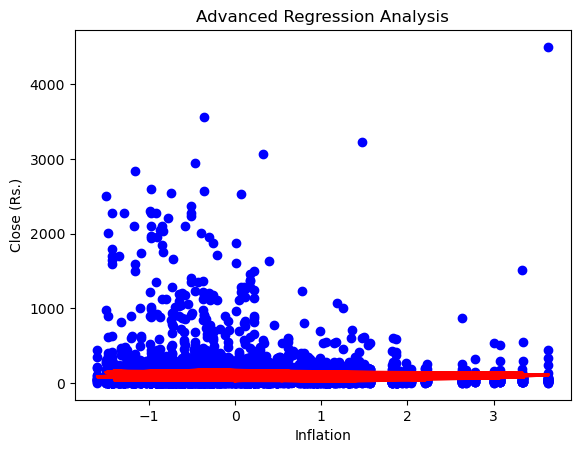

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Read your CSV data into a DataFrame
data = pd.read_csv("./final_inflation_vs_stock_values.csv")

# Data Preprocessing
X = data["Inflation"].values.reshape(-1, 1)
y = data["Close (Rs.)"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Visualization
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Inflation")
plt.ylabel("Close (Rs.)")
plt.title("Advanced Regression Analysis")
plt.show()

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

# Read your CSV data into a DataFrame
data = pd.read_csv("./final_inflation_vs_stock_values.csv")

# Select the columns of interest for the Granger causality test
data = data[["Close (Rs.)", "Inflation"]]

# Set the maximum lag value for the Granger causality test
max_lag = 3  # Adjust this value based on your specific requirements

# Perform the Granger causality test
results = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=55.8035 , p=0.0000  , df_denom=29194, df_num=1
ssr based chi2 test:   chi2=55.8093 , p=0.0000  , df=1
likelihood ratio test: chi2=55.7560 , p=0.0000  , df=1
parameter F test:         F=55.8035 , p=0.0000  , df_denom=29194, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=27.8817 , p=0.0000  , df_denom=29191, df_num=2
ssr based chi2 test:   chi2=55.7729 , p=0.0000  , df=2
likelihood ratio test: chi2=55.7197 , p=0.0000  , df=2
parameter F test:         F=27.8817 , p=0.0000  , df_denom=29191, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=18.7991 , p=0.0000  , df_denom=29188, df_num=3
ssr based chi2 test:   chi2=56.4108 , p=0.0000  , df=3
likelihood ratio test: chi2=56.3564 , p=0.0000  , df=3
parameter F test:         F=18.7991 , p=0.0000  , df_denom=29188, df_num=3


/Users/kelumrubasin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


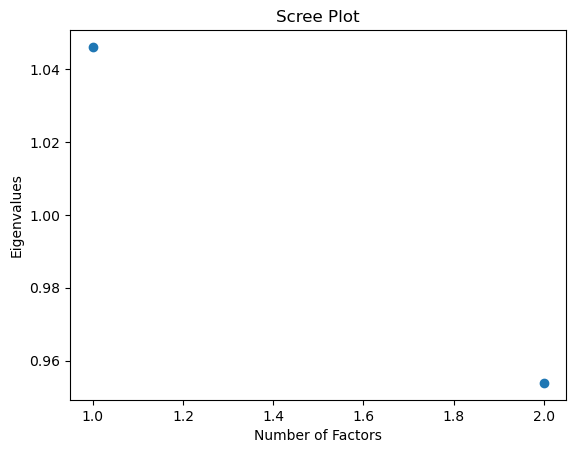

Factor Loadings:
[[ 2.14792644e-01  4.95910246e-05]
 [-2.14792644e-01  4.95910246e-05]]


In [5]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Read your CSV data into a DataFrame
data = pd.read_csv("./final_inflation_vs_stock_values.csv")

# Select the variables for factor analysis
variables = data[["Close (Rs.)", "Inflation"]]

# Initialize the FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation=None)

# Fit the model
fa.fit(variables)

# Get factor loadings
factor_loadings = fa.loadings_

# Get eigenvalues and explained variance
eigenvalues, variance = fa.get_eigenvalues()

# Scree plot
plt.scatter(range(1, len(eigenvalues) + 1), eigenvalues)
plt.title("Scree Plot")
plt.xlabel("Number of Factors")
plt.ylabel("Eigenvalues")
plt.show()

# Factor loadings
print("Factor Loadings:")
print(factor_loadings)



